# Numerical results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import examples as exa
import scipy.integrate as si
from plot_ex import plot_order, plot_contourn
from integrators import HBr
plt.rcParams['font.size'] = 15
np.sqrt(10.0**211)

3.162277660168379e+105


Method                          | Abbreviation|X0    |P0        |X0t    |P0t
--------                        | -------     |-----|-----     |----- |-----
Relativistic Bregman Bravetti   | RB          |0    | gradh(P0)|  -   |-
Relativistic Bregman Bravetti (adap)   | RB          |0    | gradh(P0)|  -   |-
Adaptative HTVI                 | HTVI_adap   |0    | 0        |(0,1) |-Hbr(X0,P0,X0t)
Direct Splitting (Betancourt)   | BS_d        |0    | 0        |    - |0
CM                               
NAG

## Example 1 (Quartic function)

Let us start with a quartic function

\begin{equation}\label{eq:quart}
f(X)=[(X-1)^T \Sigma (X-1)]^2\in \mathbb{R}^{50},\quad \Sigma_{ij}=0.9^{|i-j|}. 
\end{equation}
This convex function achieves its minimum value $0$ at $x^*=1$.


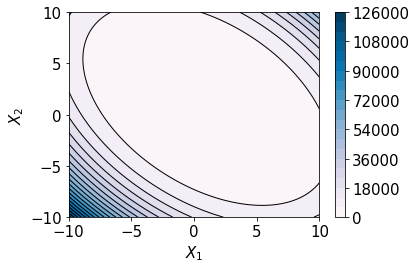

In [2]:
n = 2 # dimension
ex = exa.Example1(n)
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [7]:
## Parameters
dt = 1e-3
c = 2 #c = 3  # order
C = 2.3 #C = 2.302585093
m=0.01
v=1000
mu=0.8
steps =10000
params=[v, m, c, C, mu]

In [8]:
# Initial conditions 
p0 = np.zeros(n)  # p0=(0,0,...,0)
x0 = np.random.rand(n)
#x0=np.ones(n)
#x0 = np.zeros(n)  # x0=(0,0,...,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) #np.zeros(q0.shape)
init =[x0, x0_t, p0, p0_t] 

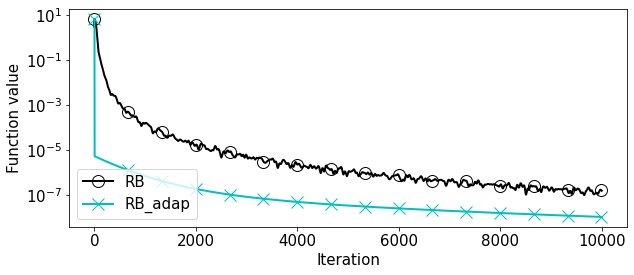

In [10]:
plt.figure(figsize=(10, 4))
#plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('CM', color='r', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('NAG', color='g', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)


## Example 2 (Quartic function 2)

\begin{equation}
f(X)=\sum_{i=1}^n i X_i^{4},  \quad n=50.
\end{equation}
This function is an example of a convex function that has a global minimum at $f(0)=0$, surrounded by a very flat region.

$x_0=(2,2,...,2)$


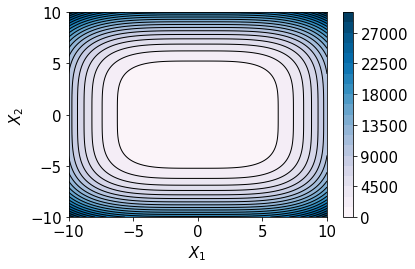

In [11]:
n = 50 # dimension
ex = exa.Example2() 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [28]:
## Parameters
dt = 1e-4
c = 4  # order
Cadap = 1
C=1
steps =800
m=0.01
v=1000
mu=0.8
params=[v, m, c, C,mu]
params_adap=[v, m, c, Cadap,mu]

In [29]:
# Initial conditions 
p0 = np.zeros(n)     # p0=(0,0,...,0)
x0 = 2*np.ones(n)    # x0=(2,2,...,2)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

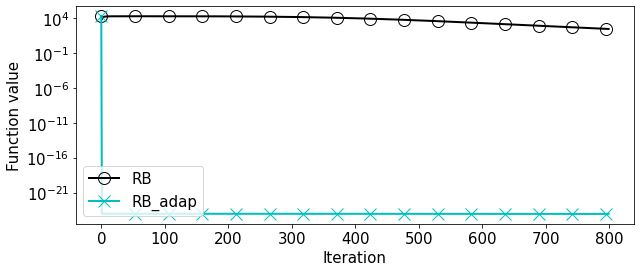

In [30]:
plt.figure(figsize=(10, 4))
#plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=1e-4,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='c', marker='x',params=params_adap, dt=1e-3,steps=steps,ex=ex, init=init)
#plot_order('CM', color='r', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('NAG', color='g', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)

## Example 3 (Schwefel function)
$$f(x) \equiv \sum_{i=1}^{n} x_{i}^{10} .$$
The minimum is at $f(0)=0$. The function is usually considered over $-10 \leqslant x_{i} \leqslant 10$. This function grows even stronger than the previous two cases. We consider $n=20$ dimensions and initialize at $x_{0}=(2, \ldots, 2) .$ Note that $\delta>0$ is essential to control the kinetic energy and improve convergence.


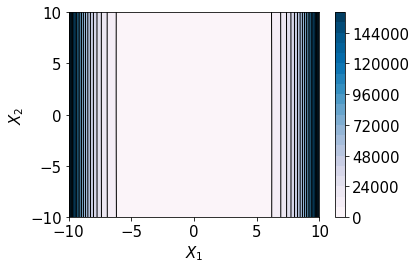

In [204]:
n = 20
seed = 0
ex = exa.Example3(n) 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [96]:
# Params
dt = 1e-3
c = 2   # order
C = 500         #try 500
steps =7000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]

In [97]:
# Initial conditions 
p0 = np.zeros(n)     # p0=(0,0)
x0 = 2*np.ones(n)    # x0=(2,2,...,2)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/integrators.py:131: RuntimeWarning: overflow encountered in square
  sq = np.sqrt(v ** 2 * m ** 2 + np.sum(p**2))
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/integrators.py:166: RuntimeWarning: overflow encountered in square
  sq = np.sqrt(v ** 2 * m ** 2 + np.sum(p**2))


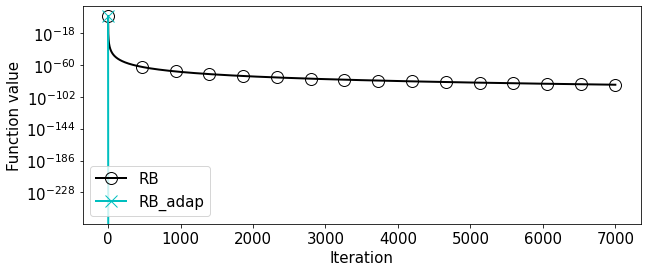

In [98]:
plt.figure(figsize=(10, 4))
#plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('CM', color='r', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('NAG', color='g', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)

## Example 4 (Matyas function)
Matyas function:
$$f(x, y) \equiv 0.26\left(x^{2}+y^{2}\right)-0.48 x y .$$ 
Global minimum is at $f(0,0)=0 .$ We initialize at $x_{0}=(10,-7)$. This function is usually evaluated on the region $-10 \leqslant x, y \leqslant 10$. 

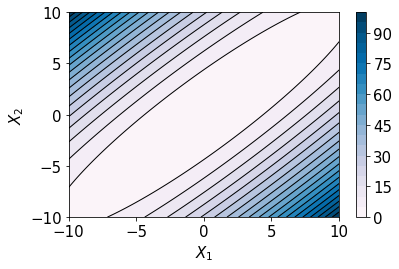

In [103]:
ex = exa.Example4() 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [104]:
# Params
dt = 0.01 
c = 2   # order
C = 1 #try 500
steps =5000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]

In [105]:
# Initial conditions 
n=2
x0 = np.array([10, -7])
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

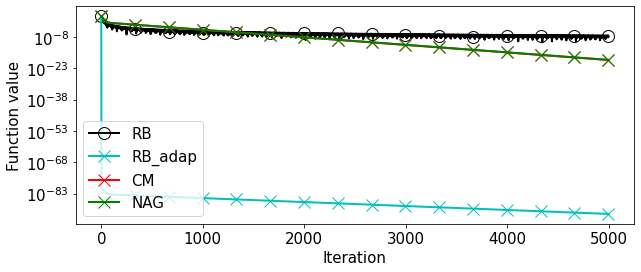

In [106]:
plt.figure(figsize=(10, 4))
#plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('CM', color='r', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('NAG', color='g', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)

## Example 5 (Beale function)
$f(x, y) \equiv(1.5-x+x y)^{2}+\left(2.25-x+x y^{2}\right)^{2}+(2.625$ $\left.-x+x y^{3}\right)^{2} .$ The global minimum is at $f(3,1 / 2)=0$, lying on a flat and narrow valley which makes optimization challenging. Note also that this functions grows stronger than a quadratic. This function is usually considered on the region $-4.5 \leqslant$ $x, y \leqslant 4.5 .$ We initialize at $x_{0}=(-3,-3) .$ 

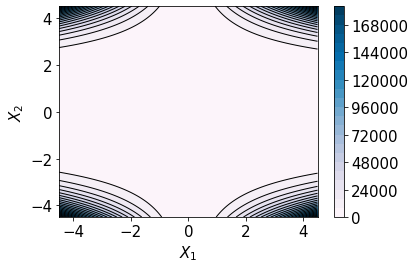

In [146]:
ex = exa.Example5() 
plot_contourn(ex, xmin=-4.5, xmax=4.5, ymin=-4.5, ymax=4.5)

In [166]:
# Params
dt = 1e-2
c = 2  # order
C = 0.1 #try 500
steps =1000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]

In [167]:
n=2
x0 = np.array([-3,-3])
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

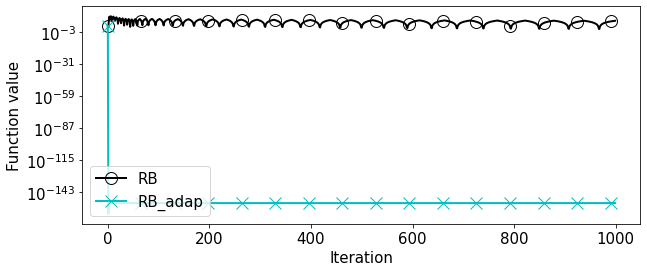

In [169]:
plt.figure(figsize=(10, 4))
#plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('CM', color='r', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('NAG', color='g', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)

## Example 6 (Chung-Reynolds function)
$$f(x) \equiv\left(\sum_{i=1}^{n} x_{i}^{2}\right)^{2}.$$ The global minimum is at $f(0)=0 .$ This function is usually considered on the region $-100 \leqslant x_{i} \leqslant 100 .$ We consider $n=50$ dimensions and initialize at $x_{0}=(50, \ldots, 50)$. 

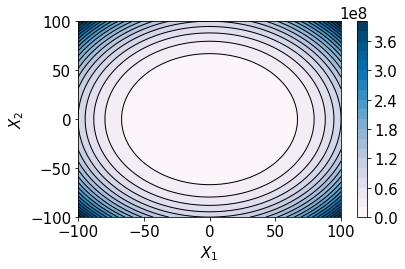

In [170]:
ex = exa.Example6() 
plot_contourn(ex, xmin=-100, xmax=100, ymin=-100, ymax=100)

In [174]:
# Params
dt = 1e-2
c = 2 # order
C = 2
steps =2000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]

In [175]:
n=50
x0 = 50*np.ones(n)
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

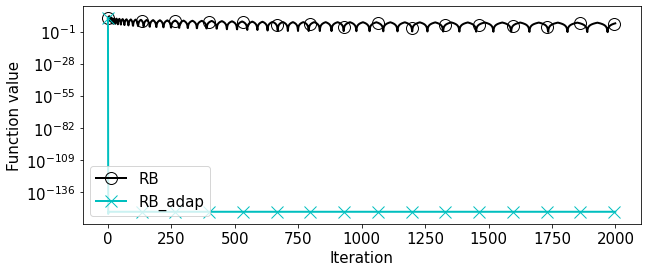

In [176]:
plt.figure(figsize=(10, 4))
#plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('CM', color='r', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('NAG', color='g', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)

## Example 7(Zakharov function)
$f(x) \equiv \sum_{i=1}^{n} x_{i}^{2}+\left(\frac{1}{2} \sum_{i=1}^{n} i x_{i}\right)^{2}+\left(\frac{1}{2} \sum_{i=1}^{n} i x_{i}\right)^{4}$ The minimum is at $f(0)=0 .$ The region of interest is usually $-5 \leqslant x_{i} \leqslant 10$. We consider $n=5$ and initialize at $x_{0}=(1, \ldots, 1) $.

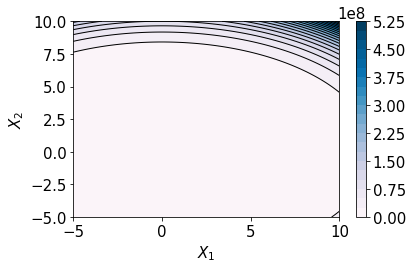

In [312]:
ex = exa.Example14() 
plot_contourn(ex, xmin=-5, xmax=10, ymin=-5, ymax=10)

In [322]:
# Params
dt = 1e-5
c = 16  # order
C = 500
steps =20000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]

In [323]:
n=5
x0 = np.ones(n)
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t]

/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/examples.py:321: RuntimeWarning: overflow encountered in double_scalars
  return np.sum(x ** 2) + (0.5 * np.dot(seq, x))**2 + (0.5 * np.dot(seq, x))**4
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/integrators.py:62: RuntimeWarning: invalid value encountered in double_scalars
  p1_t2 = (c**3 + c * cdot) / (2 * cdot * (q0_t)**(c + cdot / c + 1)) * dt * np.dot(p1, p1) \
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/examples.py:325: RuntimeWarning: overflow encountered in double_scalars
  gradV = 2 * x + 2 * (0.5 * np.dot(seq, x)) * seq + 4 * (0.5 * np.dot(seq, x)) ** 3 * seq
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/examples.py:321: RuntimeWarning: overflow encountered in square
  return np.sum(x ** 2) + (0.5 * np.dot(seq, x))**2 + (0.5 * np.dot(seq, x))**4
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/integrators.py:61:

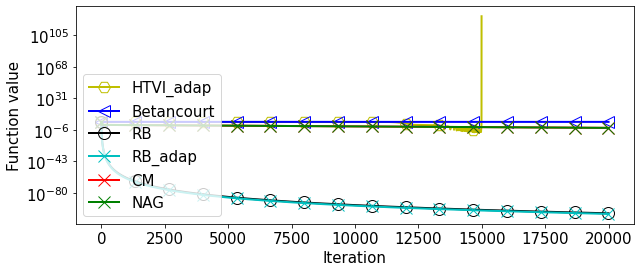

In [324]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('CM', color='r', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('NAG', color='g', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)

## Example 8(Three-hump camel back function)
$f(x, y) \equiv 2 x^{2}-1.05 x^{4}+x^{6} / 6+$ $x y+y^{2}$.
This is a multimodal function with global minimum is at $f(0,0)=0$. The region of interest is usually $-5 \leqslant x, y \leqslant 5 .$ We initialize at $x_{0}=(5,5) .$ The two local minima are somewhat close to the global minimum which makes optimization challenging. 


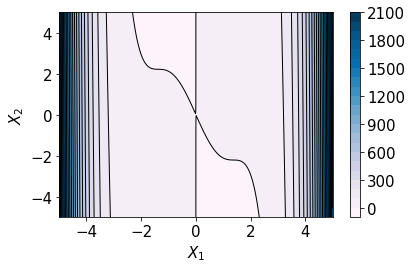

In [184]:
ex = exa.Example8() 
plot_contourn(ex, xmin=-5, xmax=5, ymin=-5, ymax=5)


In [185]:
# Params
dt = 1e-5
c = 8  # order
C = 500
steps =2000
m=0.01
v=1000
mu=0.9
params=[v, m, c, C,mu]

In [186]:
n=2
x0 = np.array([5,5])
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t]

/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/integrators.py:131: RuntimeWarning: overflow encountered in square
  sq = np.sqrt(v ** 2 * m ** 2 + np.sum(p**2))
/Users/marialuisa/Dropbox/HMC/Breg_codes/Ex article/notebook examples/integrators.py:166: RuntimeWarning: overflow encountered in square
  sq = np.sqrt(v ** 2 * m ** 2 + np.sum(p**2))


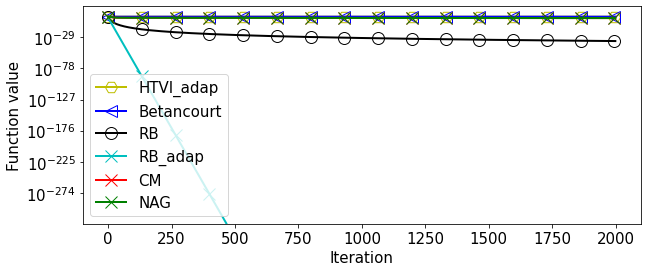

In [187]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('CM', color='r', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('NAG', color='g', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)